# Setting

In [190]:
!pip install --upgrade prince

In [123]:
!pip install faker prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 6.3 MB/s eta 0:00:00


In [30]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 33 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [282]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import random
import uuid
from datetime import datetime, timedelta
import json
import faker
import warnings

import pandas as pd
import prince
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 플롯을 위한 모듈 import
import seaborn as sns
import plotly.express as px

In [185]:
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_columns', None)  # Display all columns

# Prep: 데이터 생성

In [9]:
# fake = faker.Faker('ko_KR')
# np.random.seed(42)
# random.seed(42)

# # Constants
# n_rows = 100_000
# fraud_ratio = 0.05  # 5% fraudulent transactions
# missing_ratio = 0.2  # up to 20% missing data
# outlier_ratio = 0.02  # 2% outliers

# # Sample values
# regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
# devices = ['iPhone13,3', 'SM-G998N', 'SM-A516N', 'iPhone14,2', 'Pixel 6', 'LM-G910N']
# browsers = ['Chrome', 'Safari', 'Samsung Internet', 'Edge', 'Firefox']
# recipients = ['엄마', '아빠', '형', '친구', '회사', '택시기사', '마트', '카페', '자기자신', '기부단체']
# intents = ['transfer', 'payment', 'subscription', 'donation', 'repayment']
# auth_methods = ['OTP', '2FA', '생체인증', 'PIN', '패턴', '없음']
# payment_methods = ['신용카드', '체크카드', '계좌이체', '간편결제', '모바일결제']

# # Time range
# start_date = datetime(2025, 1, 1)
# end_date = datetime(2025, 4, 10)

# # Generate base features
# def generate_transaction(i):
#     is_fraud = np.random.rand() < fraud_ratio
#     amount = np.random.exponential(scale=30000) if not is_fraud else np.random.exponential(scale=300000)
#     if np.random.rand() < outlier_ratio:
#         amount *= 50  # Introduce outliers

#     transaction_time = start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))
#     location = random.choice(regions)
#     device = random.choice(devices)
#     browser = random.choice(browsers)
#     ip = fake.ipv4()
#     vpn_used = random.choice([True, False, False, False])  # More likely to be false
#     auth = random.choice(auth_methods)
#     method = random.choice(payment_methods)
#     recipient = random.choice(recipients)
#     intent = random.choice(intents)

#     # Randomly insert missing values
#     fields = [amount, transaction_time.isoformat() + "Z", location, device, browser, ip, vpn_used,
#               auth, method, recipient, intent, is_fraud]
#     fields = [field if np.random.rand() > missing_ratio else None for field in fields]

#     return dict(
#         transaction_amount=fields[0],
#         transaction_time=fields[1],
#         region=fields[2],
#         device_id=fields[3],
#         browser=fields[4],
#         ip_address=fields[5],
#         vpn=fields[6],
#         authentication=fields[7],
#         payment_method=fields[8],
#         recipient=fields[9],
#         intent=fields[10],
#         is_fraud=fields[11]
#     )

# # Generate dataset
# dataset = [generate_transaction(i) for i in range(n_rows)]

# # Save as JSON
# json_path = "/content/fds_korea_dataset.json"
# with open(json_path, "w", encoding='utf-8') as f:
#     json.dump(dataset, f, ensure_ascii=False)

# json_path

In [10]:
import faker
import numpy as np
import random
from datetime import datetime, timedelta
import json
import uuid

fake = faker.Faker('ko_KR')
np.random.seed(42)
random.seed(42)

# 상수 정의
n_rows = 100_000
fraud_ratio = 0.05  # 5% 사기 거래
missing_ratio = 0.2  # 최대 20% 결측치
outlier_ratio = 0.02  # 2% 이상치

# 샘플 값 정의
regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
browsers = ['Chrome', 'Safari', 'Samsung Internet', 'Edge', 'Firefox']
recipients = ['엄마', '아빠', '형', '친구', '회사', '택시기사', '마트', '카페', '자기자신', '기부단체']
banks = ['카카오뱅크', '신한은행', '국민은행', '토스뱅크', '하나은행', '우리은행']

# payment_method, intent, authentication 값 정의
payment_methods = ['P01', 'P02', 'P03', 'P04', 'P05']
intents = ['T01', 'T02', 'T03', 'T04', 'T05']
auth_methods = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']

# 시간 범위 설정
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 4, 10)

# 데이터 생성 함수 정의
def generate_transaction(i):
    is_fraud = np.random.rand() < fraud_ratio
    amount = np.random.exponential(scale=30000) if not is_fraud else np.random.exponential(scale=300000)
    if np.random.rand() < outlier_ratio:
        amount *= 50  # 이상치 생성

    transaction_time = start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))
    hour = transaction_time.hour
    location = random.choice(regions)
    # 남한 육지 위도 범위 근사치 (해남 ~ 고성 DMZ 부근)
    latitude = round(np.random.uniform(34.2, 38.6), 7)
    # 남한 육지 경도 범위 근사치 (태안반도 서쪽 ~ 포항 호미곶 부근)
    longitude = round(np.random.uniform(126.1, 129.6), 7)
    device_id = str(uuid.uuid4())[:16]  # UUID 생성 후 앞 16자리 추출
    browser = random.choice(browsers)
    ip_address = fake.ipv4()
    vpn = random.choice([True, False, False, False])  # VPN 사용 여부 (False가 더 많도록 설정)
    payment_method = random.choice(payment_methods)
    intent = random.choice(intents)
    authentication = random.choice(auth_methods)
    app_version = f"{random.randint(1, 5)}.{random.randint(0, 9)}.{random.randint(0, 9)}+{random.randint(1, 10)}"
    rooting = random.choice([True, False])
    recipient = random.choice(recipients)
    receiver_bank = random.choice(banks)
    receiver_account = ''.join(random.choices('0123456789', k=12))  # 가상 계좌번호 생성
    is_new_account_for_user = random.choice([True, False])
    avg_amount_to_bank = int(np.random.normal(250000, 50000))  # 해당 은행 평균 송금액
    amount_ratio_to_bank_avg = round(amount / avg_amount_to_bank, 2)
    is_nighttime = 1 if 0 <= hour < 6 else 0  # 야간 거래 여부 (0시-6시)
    recent_transaction_gap = round(np.random.uniform(1, 60), 1)  # 이전 거래 대비 시간 차이
    is_new_device = random.choice([True, False])
    user_id = f"user_{random.randint(1000, 9999):04d}"

    # 결측치 처리
    fields = [transaction_time.isoformat() + "Z", user_id, recipient, amount, hour, authentication, device_id,
              f"{latitude}, {longitude}", receiver_bank, receiver_account, is_new_account_for_user,
              avg_amount_to_bank, amount_ratio_to_bank_avg, is_nighttime, recent_transaction_gap,
              is_new_device, ip_address, vpn, payment_method, browser, intent, app_version, rooting, is_fraud]
    fields = [field if np.random.rand() > missing_ratio else None for field in fields]

    return dict(
        transaction_time=fields[0],
        user_id=fields[1],
        recipient=fields[2],
        transaction_amount=fields[3],
        hour=fields[4],
        authentication=fields[5],
        device_id=fields[6],
        region=fields[7],
        receiver_bank=fields[8],
        receiver_account=fields[9],
        is_new_account_for_user=fields[10],
        avg_amount_to_bank=fields[11],
        amount_ratio_to_bank_avg=fields[12],
        is_nighttime=fields[13],
        recent_transaction_gap=fields[14],
        is_new_device=fields[15],
        ip_address=fields[16],
        vpn=fields[17],
        payment_method=fields[18],
        browser=fields[19],
        intent=fields[20],
        app_version=fields[21],
        rooting=fields[22],
        is_fraud=fields[23]
    )

# 데이터셋 생성
dataset = [generate_transaction(i) for i in range(n_rows)]

# JSON 파일로 저장
json_path = "/content/fds_korea_dataset.json"
with open(json_path, "w", encoding='utf-8') as f:
    json.dump(dataset, f, ensure_ascii=False, indent=4)

print(f"JSON 파일이 {json_path}에 저장되었습니다.")

JSON 파일이 /content/fds_korea_dataset.json에 저장되었습니다.


In [138]:
df = pd.read_json('/content/fds_korea_dataset.json')

In [139]:
df.head()

transaction_time    user_id recipient  transaction_amount  hour  \
0                       NaT  user_5552        엄마        90303.642928   NaN   
1                       NaT  user_7227      None        49569.947184   4.0   
2 2025-02-23 23:27:03+00:00       None         형                 NaN  23.0   
3 2025-03-18 19:46:41+00:00  user_1188      기부단체                 NaN  19.0   
4 2025-01-23 05:50:59+00:00  user_4923      자기자신         7535.020148   5.0   

  authentication         device_id                   region receiver_bank  \
0           None  55cb0014-b5c5-49  36.8340973, 126.6460652         카카오뱅크   
1            A01  05d63db3-30f0-4c  34.6297573, 128.4948156          하나은행   
2            A02  1c745104-8d4a-40                     None          토스뱅크   
3           None  41b0a509-eb15-47   36.437711, 129.2764827          토스뱅크   
4            A02  28c0f519-33db-43                     None         카카오뱅크   

   receiver_account  is_new_account_for_user  avg_amount_to_bank  \
0      2.657744e+10                      0.0                 NaN   
1               NaN                      1.0            300525.0   
2      3.965687e+11                      0.0            279106.0   
3      3.914781e+11                      0.0                 NaN   
4      8.266176e+11                      NaN            260746.0   

   amount_ratio_to_bank_avg  is_nighttime  recent_transaction_gap  \
0                      0.34           0.0                    42.8   
1                      0.16           1.0                    27.0   
2                      0.08           0.0                     NaN   
3                      1.03           0.0                    15.7   
4                      0.03           1.0                     NaN   

   is_new_device     ip_address  vpn payment_method           browser intent  \
0            0.0           None  0.0            P02              None    T02   
1            1.0           None  NaN           None  Samsung Internet    T04   
2            1.0    17.66.66.70  0.0            P03  Samsung Internet    T03   
3            0.0  196.129.94.16  NaN            P02            Safari    T02   
4            0.0  10.223.161.25  1.0            P03  Samsung Internet    T04   

  app_version  rooting  is_fraud  
0        None      NaN       0.0  
1     3.5.9+5      1.0       0.0  
2     3.1.9+3      NaN       NaN  
3    5.8.4+10      NaN       1.0  
4     4.0.4+9      1.0       0.0

# Cleansing

## describtive stats

In [143]:
df.head(3)

transaction_time    user_id recipient  transaction_amount  hour  \
0                       NaT  user_5552        엄마        90303.642928   NaN   
1                       NaT  user_7227      None        49569.947184   4.0   
2 2025-02-23 23:27:03+00:00       None         형                 NaN  23.0   

  authentication         device_id                   region receiver_bank  \
0           None  55cb0014-b5c5-49  36.8340973, 126.6460652         카카오뱅크   
1            A01  05d63db3-30f0-4c  34.6297573, 128.4948156          하나은행   
2            A02  1c745104-8d4a-40                     None          토스뱅크   

   receiver_account  is_new_account_for_user  avg_amount_to_bank  \
0      2.657744e+10                      0.0                 NaN   
1               NaN                      1.0            300525.0   
2      3.965687e+11                      0.0            279106.0   

   amount_ratio_to_bank_avg  is_nighttime  recent_transaction_gap  \
0                      0.34           0.0                    42.8   
1                      0.16           1.0                    27.0   
2                      0.08           0.0                     NaN   

   is_new_device   ip_address  vpn payment_method           browser intent  \
0            0.0         None  0.0            P02              None    T02   
1            1.0         None  NaN           None  Samsung Internet    T04   
2            1.0  17.66.66.70  0.0            P03  Samsung Internet    T03   

  app_version  rooting  is_fraud  
0        None      NaN       0.0  
1     3.5.9+5      1.0       0.0  
2     3.1.9+3      NaN       NaN

In [144]:
df.describe()

transaction_amount          hour  receiver_account  \
count        7.998400e+04  80089.000000      7.999400e+04   
mean         8.646613e+04     11.467068      4.989782e+11   
std          7.297111e+05      6.910104      2.881736e+11   
min          5.724838e-01      0.000000      7.811997e+06   
25%          9.388295e+03      6.000000      2.496800e+11   
50%          2.298693e+04     11.000000      4.978755e+11   
75%          4.782603e+04     17.000000      7.481553e+11   
max          6.043897e+07     23.000000      9.999931e+11   

       is_new_account_for_user  avg_amount_to_bank  amount_ratio_to_bank_avg  \
count             79692.000000        80107.000000              80209.000000   
mean                  0.496700       250362.635300                  0.357869   
std                   0.499992        50068.299875                  2.974985   
min                   0.000000        31087.000000                  0.000000   
25%                   0.000000       216738.000000                  0.040000   
50%                   0.000000       250359.000000                  0.090000   
75%                   1.000000       284256.500000                  0.200000   
max                   1.000000       462666.000000                281.300000   

       is_nighttime  recent_transaction_gap  is_new_device           vpn  \
count  79894.000000            80008.000000   79918.000000  80162.000000   
mean       0.251483               30.455902       0.499462      0.251079   
std        0.433868               17.007103       0.500003      0.433637   
min        0.000000                1.000000       0.000000      0.000000   
25%        0.000000               15.700000       0.000000      0.000000   
50%        0.000000               30.500000       0.000000      0.000000   
75%        1.000000               45.200000       1.000000      1.000000   
max        1.000000               60.000000       1.000000      1.000000   

            rooting      is_fraud  
count  79802.000000  79897.000000  
mean       0.498910      0.049914  
std        0.500002      0.217769  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000

In [145]:
df.drop('is_fraud', axis = 1, inplace = True)
df.dtypes

transaction_time            datetime64[ns, UTC]
user_id                                  object
recipient                                object
transaction_amount                      float64
hour                                    float64
authentication                           object
device_id                                object
region                                   object
receiver_bank                            object
receiver_account                        float64
is_new_account_for_user                 float64
avg_amount_to_bank                      float64
amount_ratio_to_bank_avg                float64
is_nighttime                            float64
recent_transaction_gap                  float64
is_new_device                           float64
ip_address                               object
vpn                                     float64
payment_method                           object
browser                                  object
intent                                   object
app_version                              object
rooting                                 float64
dtype: object

In [146]:
categories_col = []
numerics_col = []
date_col = []
for col, dtype in df.dtypes.items():
  if dtype == 'object':
    categories_col.append(col)
  elif dtype == 'float64':
    numerics_col.append(col)
  else:
    date_col.append(col)

display(categories_col, numerics_col, date_col)

['user_id',
 'recipient',
 'authentication',
 'device_id',
 'region',
 'receiver_bank',
 'ip_address',
 'payment_method',
 'browser',
 'intent',
 'app_version']

['transaction_amount',
 'hour',
 'receiver_account',
 'is_new_account_for_user',
 'avg_amount_to_bank',
 'amount_ratio_to_bank_avg',
 'is_nighttime',
 'recent_transaction_gap',
 'is_new_device',
 'vpn',
 'rooting']

['transaction_time']

In [147]:
for item in ['user_id', 'recipient', 'device_id', 'region', 'receiver_bank', 'ip_address', 'app_version']: # region -> 시/도 단위일 경우 인코딩 고려해볼 수 있음
    if item in categories_col:
        categories_col.remove(item)

for item in ['is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn', 'rooting']:
    if item in numerics_col:
        numerics_col.remove(item)

id_col = ['user_id', 'recipient', 'device_id', 'receiver_bank', 'ip_address']
boolean_col = ['is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn', 'rooting']

In [148]:
display(categories_col, numerics_col, date_col, id_col, boolean_col)

['authentication', 'payment_method', 'browser', 'intent']

['transaction_amount',
 'hour',
 'receiver_account',
 'avg_amount_to_bank',
 'amount_ratio_to_bank_avg',
 'recent_transaction_gap']

['transaction_time']

['user_id', 'recipient', 'device_id', 'receiver_bank', 'ip_address']

['is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn', 'rooting']

## 결측값 처리

In [149]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("🔍 결측값 비율:\n", missing_ratio)

🔍 결측값 비율:
 is_new_account_for_user     0.20308
rooting                     0.20198
is_nighttime                0.20106
recipient                   0.20096
is_new_device               0.20082
ip_address                  0.20081
intent                      0.20051
authentication              0.20019
transaction_amount          0.20016
receiver_account            0.20006
payment_method              0.19993
recent_transaction_gap      0.19992
region                      0.19975
transaction_time            0.19955
browser                     0.19953
hour                        0.19911
app_version                 0.19900
avg_amount_to_bank          0.19893
receiver_bank               0.19870
vpn                         0.19838
user_id                     0.19838
amount_ratio_to_bank_avg    0.19791
device_id                   0.19772
dtype: float64


- 살리거나(보간)
- 버리거나

In [150]:
# 결측값 처리 예시
# 숫자형: 평균/중앙값으로 대체
for i in numerics_col:
  df[i] = df[i].fillna(df[i].median())

# 범주형: 최빈값으로 대체
for i in categories_col:
  df[i] = df[i].fillna(df[i].mode()[0])

# 신원정보
for i in id_col:
  df[i] = df[i].fillna('unknown')

# 불리언 타입: False 또는 최빈값 대체
for i in boolean_col:
  df[i] = df[i].fillna(df[i].mode()[0])

In [151]:
# 날짜 처리
df['transaction_time'] = pd.to_datetime(df['transaction_time'], errors='coerce')
# df['hour'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_time'].dt.dayofweek

## 매핑 처리

- 매핑 작업
1. region(latitude, longtitude)
2. payment_method
3. intent
4. authentication


- 지역 매핑처리는 일단 보류한다(이유는 하단에)

In [152]:
# 매핑 작업
trans_cols = ['payment_method', 'intent', 'authentication']
mappping = {
    'payment_method': {'P01': 1, 'P02': 2, 'P03': 3, 'P04': 4, 'P05': 5},
    'intent': {'T01': 1, 'T02': 2, 'T03': 3, 'T04': 4, 'T05': 5},
    'authentication': {'A01': 1, 'A02': 2, 'A03': 3, 'A04': 4, 'A05': 5, 'A06': 6}
}

for col in trans_cols:
    df[col] = df[col].map(mappping[col])

In [72]:
# import pandas as pd
# from geopy.geocoders import Nominatim
# import ast
# from geopy.exc import GeocoderTimedOut, GeocoderServiceError
# from functools import lru_cache

# @lru_cache(maxsize=1024)  # 최대 1024개의 결과를 캐시에 저장
# def get_region_from_coordinates(coordinates_str):
#     """
#     문자열 형태의 위도, 경도 좌표를 사용하여 한국 지역 이름을 반환합니다.
#     오류 발생 시 "unknown"을 반환

#     Args:
#         coordinates_str: "[위도, 경도]" 형태의 문자열

#     Returns:
#         지역 이름 (예: 서울, 부산)
#         오류 발생 시 "unknown"을 반환합니다.
#     """
#     try:
#         # 문자열을 리스트로 변환
#         coordinates = ast.literal_eval(coordinates_str)
#         latitude, longitude = coordinates[0], coordinates[1]

#         geolocator = Nominatim(user_agent="my_geocoder")

#         # Timeout 예외 처리 추가
#         try:
#             location = geolocator.reverse((latitude, longitude), language='ko', exactly_one=True, timeout=10)  # Timeout 설정
#         except GeocoderTimedOut:
#             print(f"Timeout for coordinates: {coordinates_str}")
#             return "unknown"
#         except GeocoderServiceError as e:
#             print(f"Geocoder service error for coordinates: {coordinates_str}, Error: {e}")
#             return "unknown"

#         address = location.raw['address']

#         # 한국 지역 이름 추출 (시/도 단위)
#         region = address.get('state', None)
#         if region is None:
#             region = address.get('city', None)
#         if region is None:
#             region = address.get('county', None)
#         if region is None:
#             region = address.get('town', None)
#         if region is None:
#             region = address.get('village', None)

#         return region

#     except (SyntaxError, ValueError) as e:
#         print(f"Invalid coordinates format: {coordinates_str}, Error: {e}")
#         return "unknown"
#     except Exception as e:
#         print(f"Unexpected error for coordinates: {coordinates_str}, Error: {e}")
#         return "unknown"

In [85]:
# # 카카오API를 사용하여 좌표->주소 변환
# import requests, json, pprint

# def get_address(lat, lng):
#     url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x="+lng+"&y="+lat
#     # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
#     # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
#     headers = {"Authorization": "KakaoAK b79b03533a431fc0a6d52931e5afc4a7"}
#     api_json = requests.get(url, headers=headers)
#     full_address = json.loads(api_json.text)

#     return full_address

# full_address = get_address('36.5760732781656', '128.15935928504484')
# pprint.pprint(full_address)

{'documents': [{'address_name': '경상북도 상주시 함창읍 교촌리',
                'code': '4725025025',
                'region_1depth_name': '경상북도',
                'region_2depth_name': '상주시',
                'region_3depth_name': '함창읍',
                'region_4depth_name': '교촌리',
                'region_type': 'B',
                'x': 128.15947674840257,
                'y': 36.57783918356101},
               {'address_name': '경상북도 상주시 함창읍',
                'code': '4725025000',
                'region_1depth_name': '경상북도',
                'region_2depth_name': '상주시',
                'region_3depth_name': '함창읍',
                'region_4depth_name': '',
                'region_type': 'H',
                'x': 128.17949216348367,
                'y': 36.57013851206198}],
 'meta': {'total_count': 2}}


In [113]:
import pandas as pd
import requests
import json
import time # API 호출 지연을 위해 추가
import pprint # 결과 확인용 (선택 사항)

# --- 1. 카카오 API 호출 함수 (사용자 제공 함수 수정) ---
def address_name(lat, lng):
    """주어진 위도(lat), 경도(lng)를 카카오 API를 이용해 주소로 변환합니다."""
    # !!! 중요: YOUR_KAKAO_REST_API_KEY 부분을 실제 카카오 REST API 키로 바꾸세요 !!!
    api_key = "b79b03533a431fc0a6d52931e5afc4a7" # <--- 실제 API 키 입력

    if api_key == "YOUR_KAKAO_REST_API_KEY":
        print("경고: 카카오 REST API 키를 설정해야 합니다.")
        return "API 키 필요" # 또는 오류를 발생시킬 수 있습니다.

    url = f"https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={lng}&y={lat}"
    headers = {"Authorization": f"KakaoAK {api_key}"}

    try:
        response = requests.get(url, headers=headers, timeout=5) # 타임아웃 설정
        response.raise_for_status() # HTTP 오류 발생 시 예외 발생 (4xx, 5xx)
        data = response.json()

        # API 응답 구조 확인 및 주소 추출
        if data.get('documents') and len(data['documents']) > 0:
            # 'address' 객체 안의 'address_name' (지번 주소) 우선 사용
            # 없다면 'road_address' 객체 안의 'address_name' (도로명 주소) 사용
            address_info = data['documents'][0]
            if address_info.get('address') and address_info['address'].get('address_name'):
                return address_info['address']['address_name']
            elif address_info.get('road_address') and address_info['road_address'].get('address_name'):
                return address_info['road_address']['address_name']
            else:
                # 결과는 있으나 주소 필드가 없는 경우
                return "주소 정보 없음"
        else:
            # API가 해당 좌표에 대한 결과를 반환하지 못한 경우 (예: 바다 위 좌표)
            return "결과 없음"

    except requests.exceptions.Timeout:
        print(f"API 요청 시간 초과: ({lat}, {lng})")
        return "API 시간 초과"
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP 오류 발생: {http_err} - 응답: {response.text}")
        # NotAuthorizedError 처리
        if response.status_code == 401 and 'NotAuthorizedError' in response.text:
             print("-> 카카오 개발자센터에서 '지도/로컬' API가 활성화되었는지, API 키가 정확한지 확인하세요.")
             return "API 권한 오류"
        return f"HTTP 오류: {response.status_code}"
    except requests.exceptions.RequestException as req_err:
        print(f"API 요청 오류 발생: {req_err}")
        return "API 요청 오류"
    except json.JSONDecodeError:
        print(f"API 응답 JSON 파싱 오류: ({lat}, {lng}) - 응답: {response.text}")
        return "API 응답 형식 오류"
    except KeyError as key_err:
        print(f"API 응답 키 오류: {key_err} - 응답 구조 확인 필요")
        return "API 응답 구조 오류"
    except Exception as e:
        print(f"알 수 없는 오류 발생 ({lat}, {lng}): {e}")
        return f"기타 오류 발생"


# --- 2. 좌표 -> 주소 변환 함수 (DataFrame 적용용) ---
def map_coordinates_to_address(region_str):
    """DataFrame의 'region' 문자열을 받아 주소로 변환하는 함수"""
    if pd.isna(region_str) or not isinstance(region_str, str) or ',' not in region_str:
        return None # 결측치 또는 잘못된 형식 처리

    try:
        # 쉼표(,)로 분리하고 앞뒤 공백 제거
        lat, lng = map(str.strip, region_str.split(','))

        # API 호출 (사이에 약간의 지연 시간 추가)
        # 대량 데이터 처리 시 이 값을 늘려야 할 수 있습니다 (예: 0.1 또는 그 이상).
        time.sleep(0.05) # 0.05초 지연 (초당 20회 호출 제한 고려)

        address = address_name(lat, lng) # full address(json): get_address(lat, lng)
        return address
    except ValueError:
        print(f"좌표 형식 오류: {region_str}")
        return "좌표 형식 오류" # 쉼표로 분리는 되나 숫자로 변환 안되는 등
    except Exception as e:
        print(f"'region' 처리 중 예상치 못한 오류 ({region_str}): {e}")
        return "처리 중 오류"

In [115]:
# --- 3. DataFrame 'region' 열에 함수 적용하여 'address' 열 생성 ---
# .apply() 메소드를 사용하여 각 행의 'region' 값에 대해 map_coordinates_to_address 함수 실행
df['address'] = df['region'].head(5).apply(map_coordinates_to_address)

# --- 5. 결과 확인 ---
print("\n--- 주소 매핑 후 DataFrame ---")
df.head()


--- 주소 매핑 후 DataFrame ---


transaction_time    user_id recipient  transaction_amount  hour  \
0                       NaT  user_5552        엄마        90303.642928  11.0   
1                       NaT  user_7227   unknown        49569.947184   4.0   
2 2025-02-23 23:27:03+00:00    unknown         형        22986.930377  23.0   
3 2025-03-18 19:46:41+00:00  user_1188      기부단체        22986.930377  19.0   
4 2025-01-23 05:50:59+00:00  user_4923      자기자신         7535.020148   5.0   

   authentication         device_id                   region receiver_bank  \
0               1  e173ce7e-345d-4e  36.8340973, 126.6460652         카카오뱅크   
1               1  2ee82995-19c4-4f  34.6297573, 128.4948156          하나은행   
2               2  2e93f599-6204-44  34.2000231, 128.8748906          토스뱅크   
3               1  4fad262e-e9ba-40   36.437711, 129.2764827          토스뱅크   
4               2  a5f9ac67-445c-4a  34.2000231, 128.8748906         카카오뱅크   

   receiver_account  is_new_account_for_user  avg_amount_to_bank  \
0      2.657744e+10                      0.0            250359.0   
1      4.978755e+11                      1.0            300525.0   
2      3.965687e+11                      0.0            279106.0   
3      3.914781e+11                      0.0            250359.0   
4      8.266176e+11                      0.0            260746.0   

   amount_ratio_to_bank_avg  is_nighttime  recent_transaction_gap  \
0                      0.34           0.0                    42.8   
1                      0.16           1.0                    27.0   
2                      0.08           0.0                    30.5   
3                      1.03           0.0                    15.7   
4                      0.03           1.0                    30.5   

   is_new_device      ip_address  vpn  payment_method           browser  \
0            0.0         unknown  0.0               2              Edge   
1            1.0         unknown  0.0               5  Samsung Internet   
2            1.0  57.197.111.136  0.0               3  Samsung Internet   
3            0.0   52.91.135.142  0.0               2            Safari   
4            0.0  118.227.38.239  1.0               3  Samsung Internet   

   intent app_version  rooting  day_of_week   address  
0       2    5.1.3+10      0.0          NaN  주소 정보 없음  
1       4     3.5.9+5      1.0          NaN  주소 정보 없음  
2       3     3.1.9+3      0.0          6.0  주소 정보 없음  
3       2    5.8.4+10      0.0          1.0  주소 정보 없음  
4       4     4.0.4+9      1.0          3.0  주소 정보 없음

In [ ]:
df.drop('address', axis = 1, inplace = True)
df.dropna(inplace = True)

## 인코딩

In [153]:
display(categories_col, numerics_col, date_col, id_col, boolean_col)

['authentication', 'payment_method', 'browser', 'intent']

['transaction_amount',
 'hour',
 'receiver_account',
 'avg_amount_to_bank',
 'amount_ratio_to_bank_avg',
 'recent_transaction_gap']

['transaction_time']

['user_id', 'recipient', 'device_id', 'receiver_bank', 'ip_address']

['is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn', 'rooting']

In [154]:
# 범주형 인코딩 (예: one-hot 또는 label encoding)
df = pd.get_dummies(df, columns=categories_col + boolean_col, drop_first=True)

In [155]:
for k, v in df.dtypes.items():
  if v == 'bool':
    df[k] = df[k].astype(int)

# 모델링을 위한 최종 컬럼 확인
print("최종 컬럼 목록:\n", df.columns.tolist())

최종 컬럼 목록:
 ['transaction_time', 'user_id', 'recipient', 'transaction_amount', 'hour', 'device_id', 'region', 'receiver_bank', 'receiver_account', 'avg_amount_to_bank', 'amount_ratio_to_bank_avg', 'recent_transaction_gap', 'ip_address', 'app_version', 'day_of_week', 'authentication_2', 'authentication_3', 'authentication_4', 'authentication_5', 'authentication_6', 'payment_method_2', 'payment_method_3', 'payment_method_4', 'payment_method_5', 'browser_Edge', 'browser_Firefox', 'browser_Safari', 'browser_Samsung Internet', 'intent_2', 'intent_3', 'intent_4', 'intent_5', 'is_new_account_for_user_1.0', 'is_nighttime_1.0', 'is_new_device_1.0', 'vpn_1.0', 'rooting_1.0']


## Outlier 제거

- 이 부분에 대한 고민이 필요
- 지도학습의 경우: Outlier 그 자체가 fraud인가?
- 비지도학습의 경우:Outlier가 군집을 형성하는지
- 전체적으로 Outlier에 대한 특성 파악이 선행되어야 함

In [ ]:
# # 이상치 탐지 (금액 기준)
# q1 = df['transaction_amount'].quantile(0.25)
# q3 = df['transaction_amount'].quantile(0.75)
# iqr = q3 - q1
# upper_bound = q3 + 1.5 * iqr
# outliers = df[df['transaction_amount'] > upper_bound]
# print(f"🚨 이상치 개수: {len(outliers)}")

# EDA

## Statistical analysis

## 시각화

### Numeric

In [156]:
df.columns

Index(['transaction_time', 'user_id', 'recipient', 'transaction_amount',
       'hour', 'device_id', 'region', 'receiver_bank', 'receiver_account',
       'avg_amount_to_bank', 'amount_ratio_to_bank_avg',
       'recent_transaction_gap', 'ip_address', 'app_version', 'day_of_week',
       'authentication_2', 'authentication_3', 'authentication_4',
       'authentication_5', 'authentication_6', 'payment_method_2',
       'payment_method_3', 'payment_method_4', 'payment_method_5',
       'browser_Edge', 'browser_Firefox', 'browser_Safari',
       'browser_Samsung Internet', 'intent_2', 'intent_3', 'intent_4',
       'intent_5', 'is_new_account_for_user_1.0', 'is_nighttime_1.0',
       'is_new_device_1.0', 'vpn_1.0', 'rooting_1.0'],
      dtype='object')

In [157]:
heatmap_df = df[['transaction_amount', 'hour', 'avg_amount_to_bank', 'amount_ratio_to_bank_avg', 'recent_transaction_gap']]

In [158]:
cat_df = df[['authentication_2', 'authentication_3', 'authentication_4', 'authentication_5', 'authentication_6',
             'payment_method_2', 'payment_method_3', 'payment_method_4', 'payment_method_5',
             'browser_Edge', 'browser_Firefox', 'browser_Safari', 'browser_Samsung Internet',
             'intent_2', 'intent_3', 'intent_4', 'intent_5',
             'is_new_account_for_user_1.0', 'is_nighttime_1.0', 'is_new_device_1.0', 'vpn_1.0', 'rooting_1.0']]

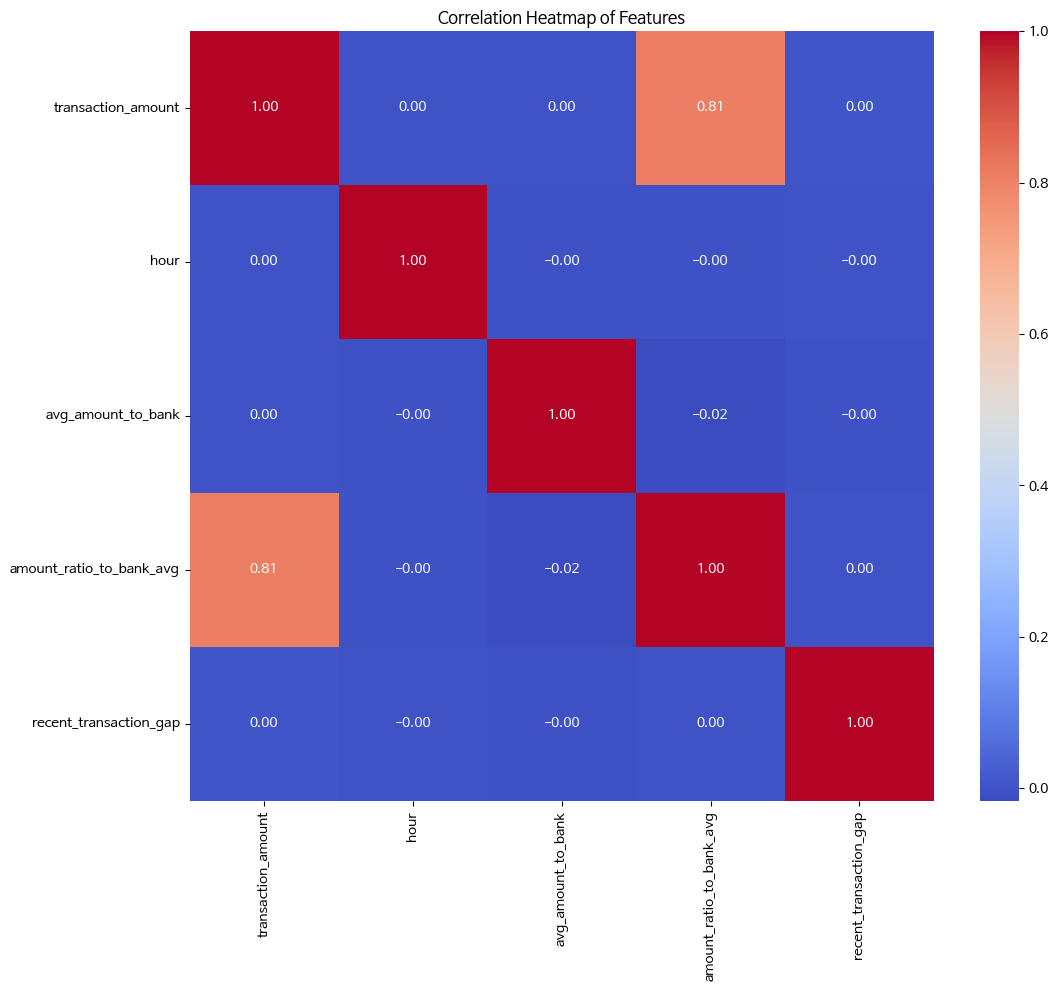

In [159]:
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

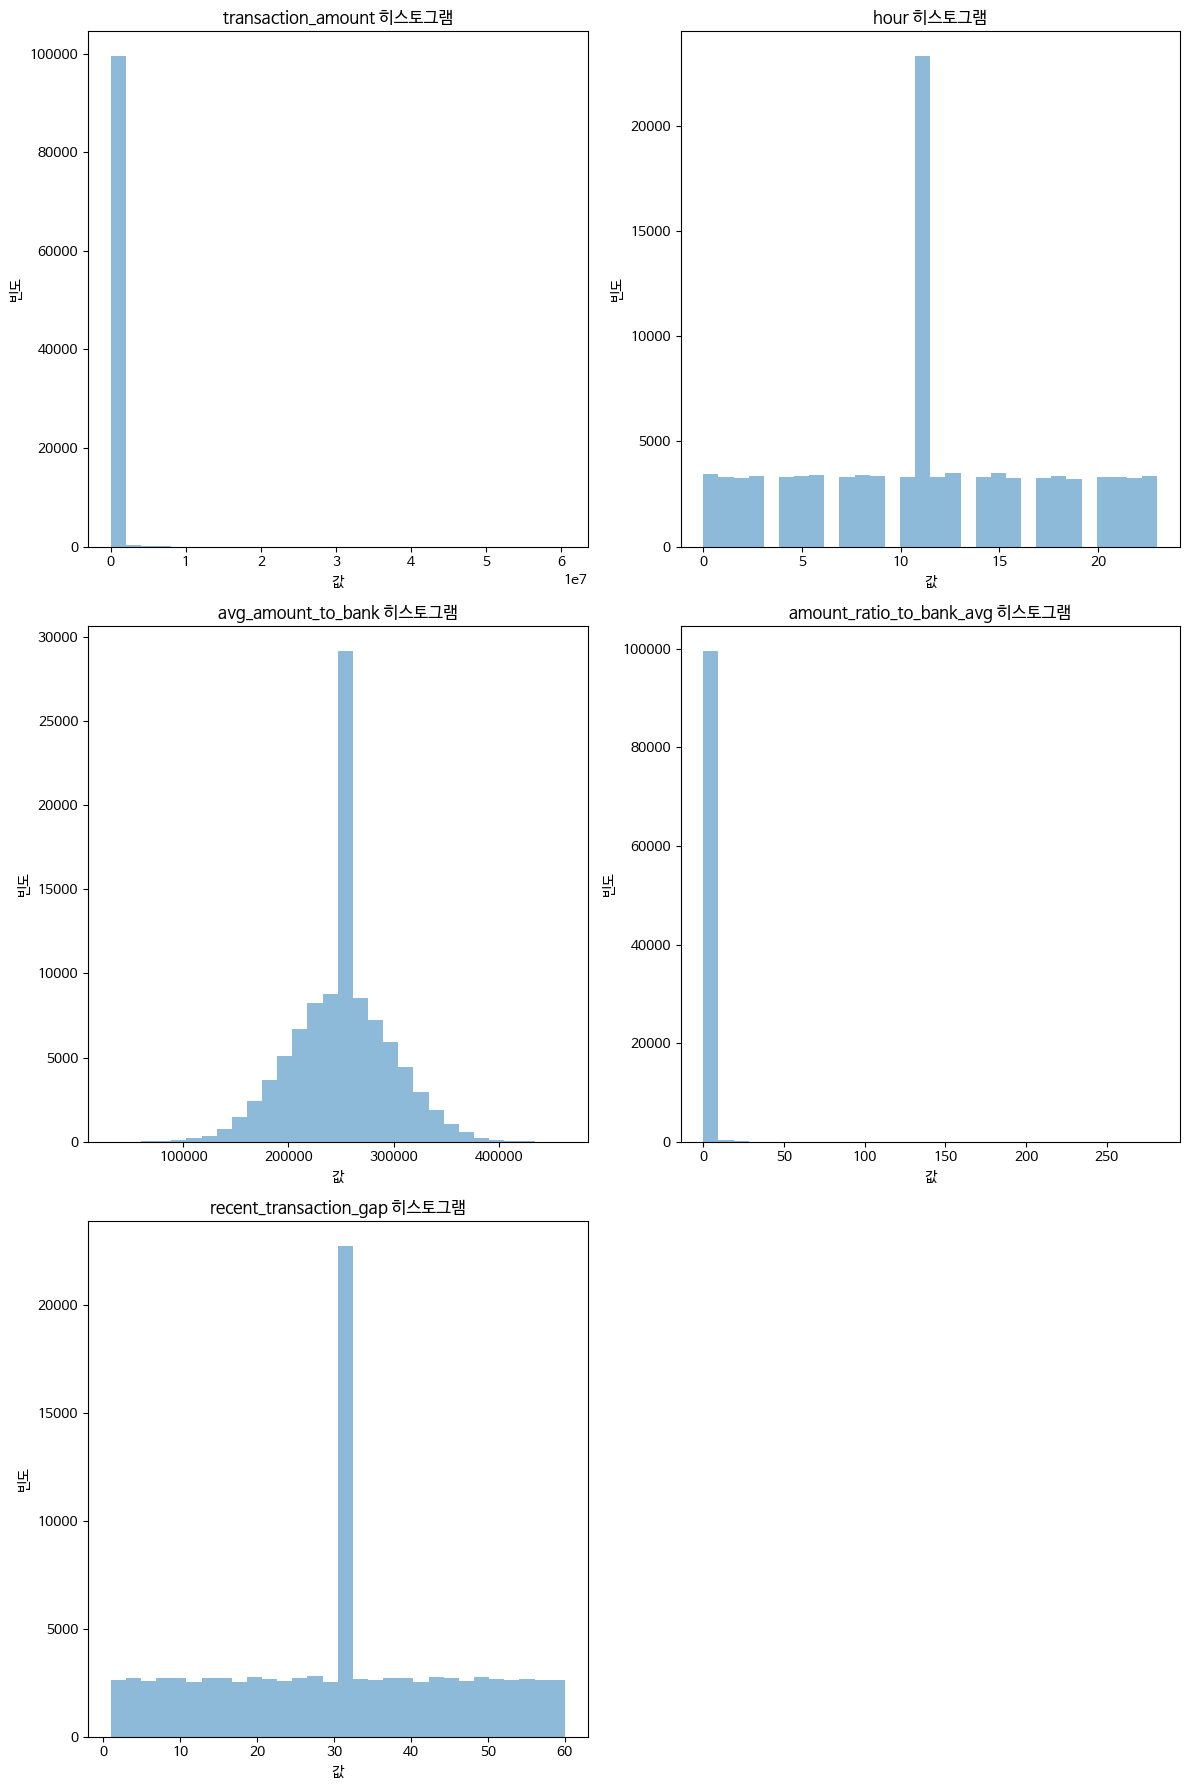

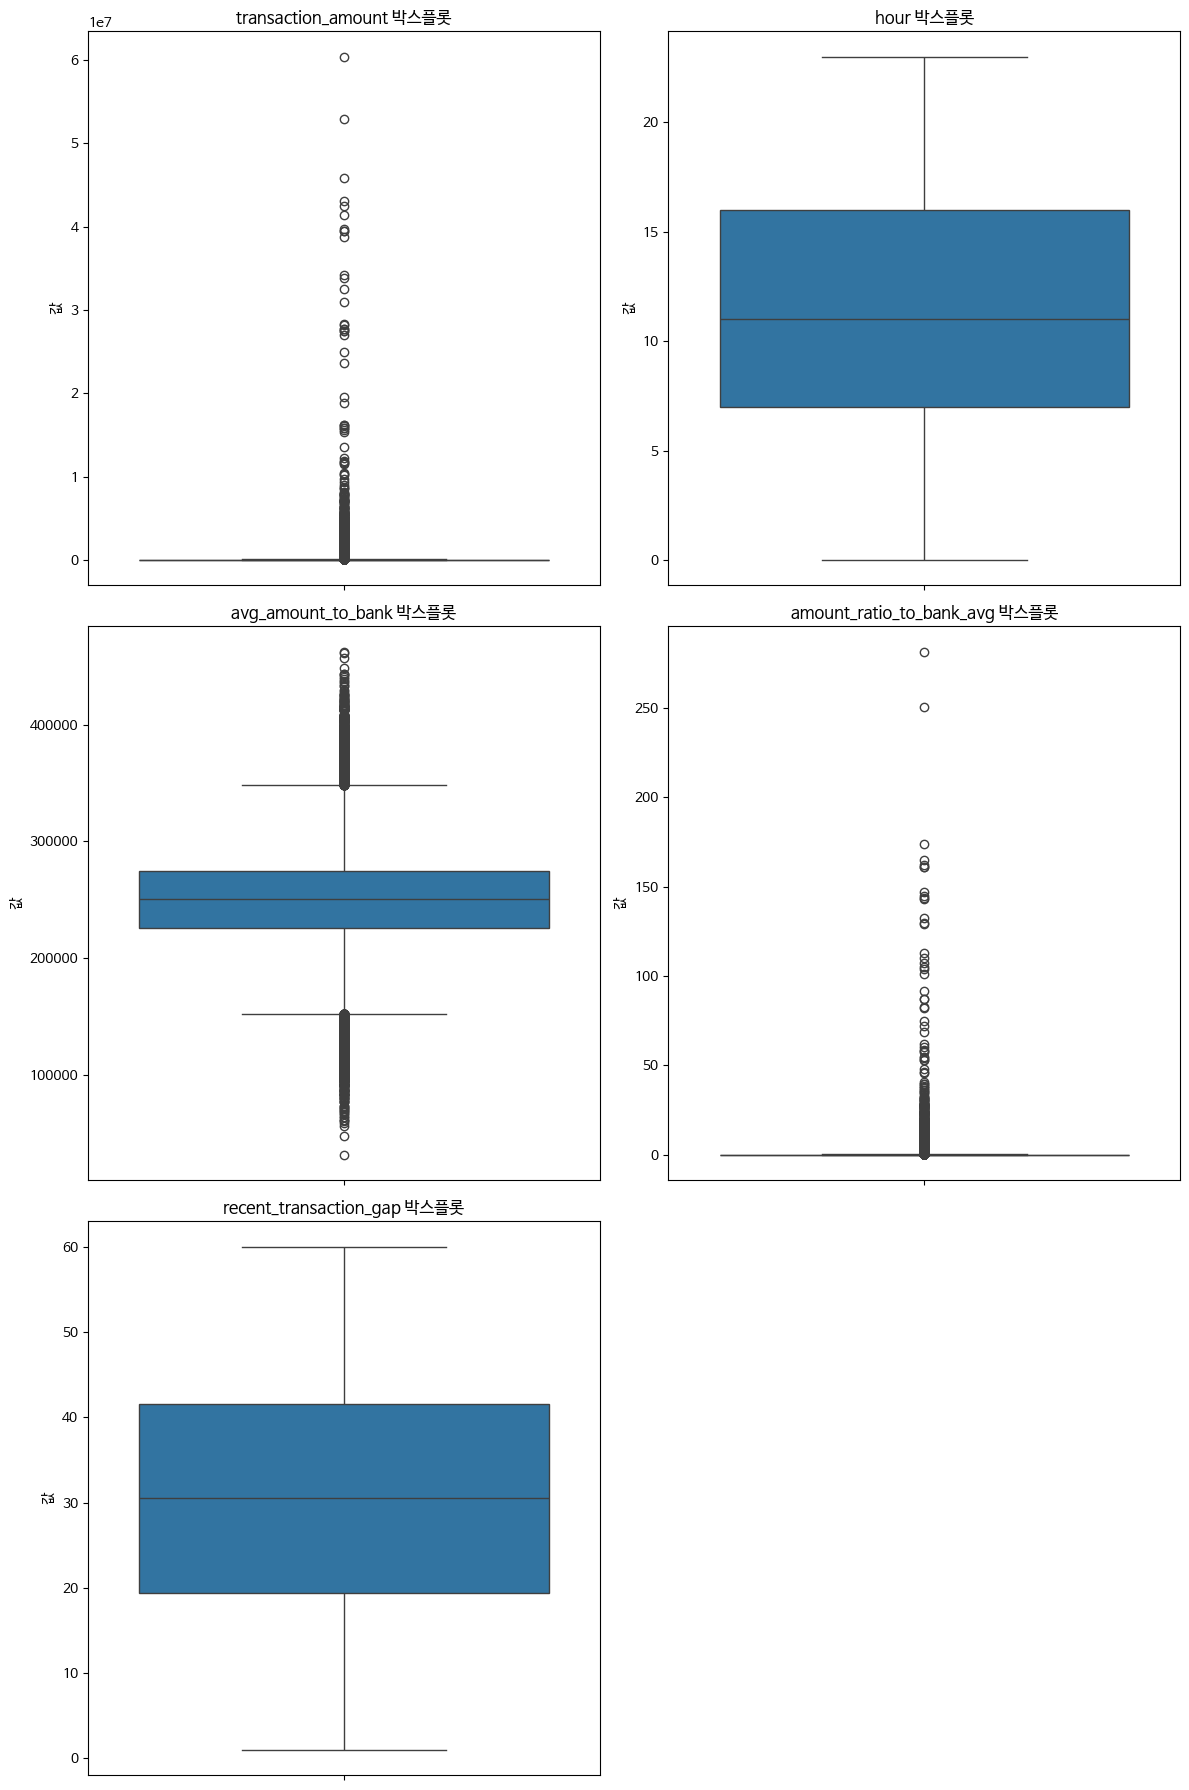

In [160]:
# 히스토그램 (서브플롯으로 분리, 2열 배치)
num_cols = len(heatmap_df.columns)
num_rows = (num_cols + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# 각 컬럼에 대한 히스토그램 생성
for i, col in enumerate(heatmap_df.columns):
    row = i // 2
    col_index = i % 2
    ax = axes[row, col_index]

    ax.hist(heatmap_df[col], bins=30, alpha=0.5)
    ax.set_title(f'{col} 히스토그램')
    ax.set_xlabel('값')
    ax.set_ylabel('빈도')

# 빈 슬롯 삭제
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

# 박스플롯 (서브플롯으로 분리, 2열 배치)
num_cols = len(heatmap_df.columns)
num_rows = (num_cols + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(heatmap_df.columns):
    row = i // 2
    col_index = i % 2
    ax = axes[row, col_index]

    sns.boxplot(y=heatmap_df[col], ax=ax)
    ax.set_title(f'{col} 박스플롯')
    ax.set_ylabel('값')

# 빈 슬롯 삭제
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

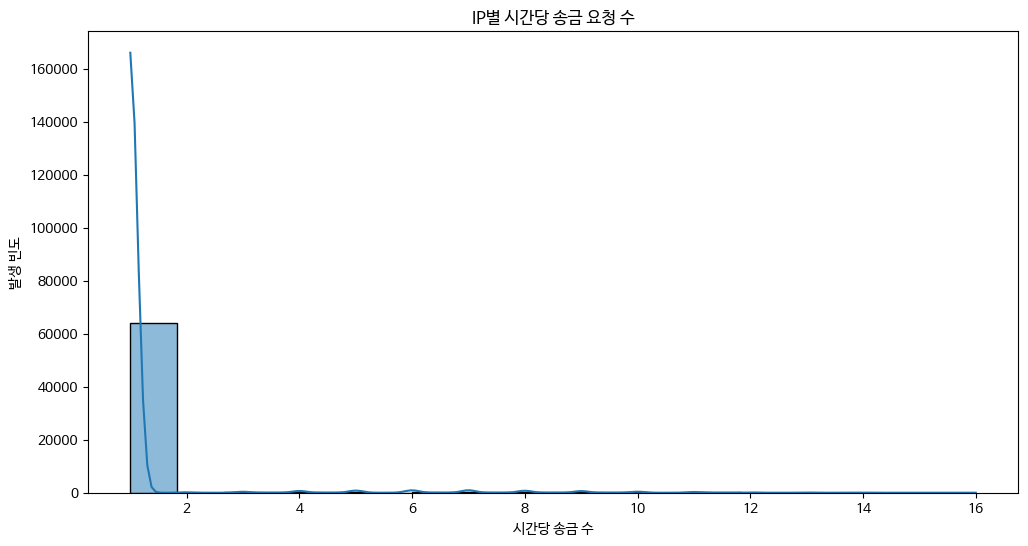

In [161]:
# ip주소 기준 거래 시간, 거래 횟수 grouping
hourly_transactions = df.groupby(['ip_address', pd.Grouper(key='transaction_time', freq='h')]).size().reset_index(name='transaction_count')

# 거래 빈도 분포
plt.figure(figsize=(12, 6))
sns.histplot(hourly_transactions['transaction_count'], kde=True)
plt.title('IP별 시간당 송금 요청 수')
plt.xlabel('시간당 송금 수')
plt.ylabel('발생 빈도')
plt.show()

### Categorial

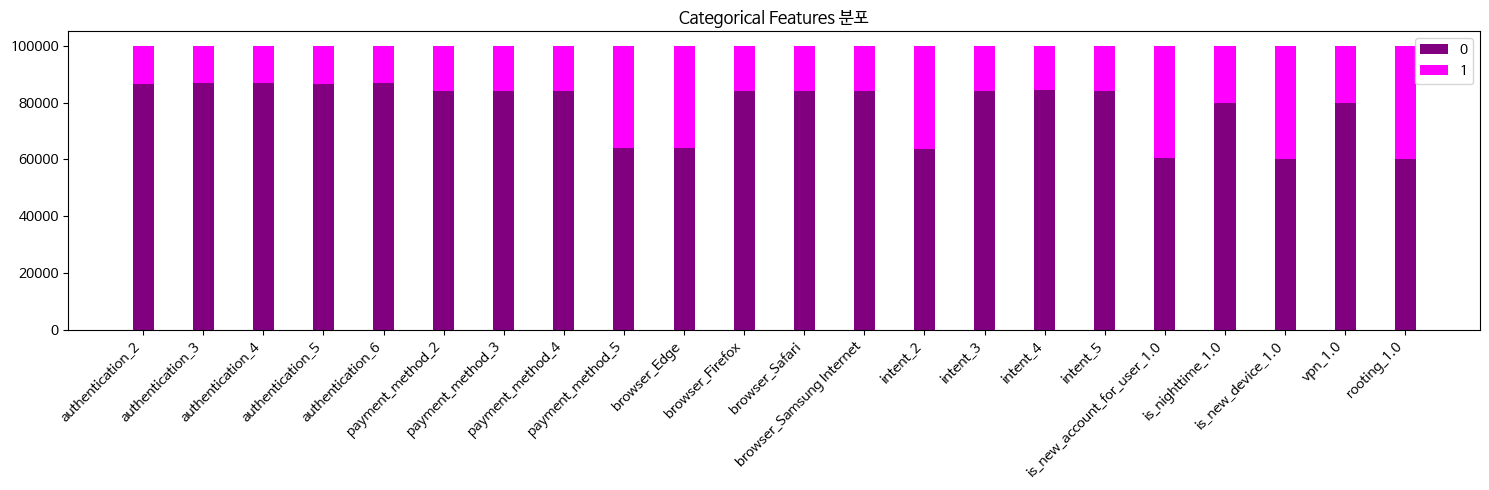

In [162]:
# cat_df의 각 컬럼별 값의 개수를 세어 데이터프레임 생성
cat_counts = cat_df.apply(pd.value_counts).T.fillna(0)

# 컬럼명을 index로 이동
cat_counts = cat_counts.reset_index().rename(columns={'index': 'Category'})

# --- 누적 막대 그래프 생성 (단일 플롯) ---
fig, ax = plt.subplots(figsize=(15, 5))  # 단일 플롯 생성

# 각 컬럼에 대해 0과 1 값을 분리하여 누적 막대 생성
width = 0.35  # 막대 너비 조정
x_pos = np.arange(len(cat_counts['Category']))  # x축 위치 설정

# 컬럼별 색상 지정 (선택 사항)
colors = ['purple', 'magenta'] #'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray'

bottom = np.zeros(len(cat_counts['Category']))  # 누적 막대 시작 위치 초기화

for i, col in enumerate(cat_counts.columns[1:]):  # 'Category' 컬럼 제외
    values = cat_counts[col]  # 해당 컬럼의 값들

    # 0 값과 1 값을 분리하지 않고 전체 값을 사용하여 막대 생성
    ax.bar(x_pos, values, width, bottom=bottom, color=colors[i % len(colors)], label=col)

    bottom += values  # 다음 컬럼 막대의 시작 위치 업데이트

ax.set_xticks(x_pos)
ax.set_xticklabels(cat_counts['Category'], rotation=45, ha='right')

ax.set_title('Categorical Features 분포')
ax.legend()
plt.tight_layout()
plt.show()

## FAMD(Factor Analysis of Mixed Data)

In [250]:
famd_df = df.copy()

In [251]:
famd_df = famd_df.drop(columns=['transaction_time', 'user_id', 'recipient', 'device_id', 'region', 'receiver_bank', 'receiver_account', 'ip_address', 'app_version'], axis=1)

In [252]:
freq_famd = famd_df['day_of_week'].mode()[0]
famd_df['day_of_week'].fillna(freq_famd, inplace=True)

In [177]:
# 1. 모델 초기화 -> 학습
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine='sklearn'
)

famd = famd.fit(famd_df)

In [197]:
famd_df.head()

transaction_amount  hour  avg_amount_to_bank  amount_ratio_to_bank_avg  \
0        90303.642928  11.0            250359.0                      0.34   
1        49569.947184   4.0            300525.0                      0.16   
2        22986.930377  23.0            279106.0                      0.08   
3        22986.930377  19.0            250359.0                      1.03   
4         7535.020148   5.0            260746.0                      0.03   

   recent_transaction_gap  day_of_week  authentication_2  authentication_3  \
0                    42.8          2.0                 0                 0   
1                    27.0          2.0                 0                 0   
2                    30.5          6.0                 1                 0   
3                    15.7          1.0                 0                 0   
4                    30.5          3.0                 1                 0   

   authentication_4  authentication_5  authentication_6  payment_method_2  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 1   
4                 0                 0                 0                 0   

   payment_method_3  payment_method_4  payment_method_5  browser_Edge  \
0                 0                 0                 0             1   
1                 0                 0                 1             0   
2                 1                 0                 0             0   
3                 0                 0                 0             0   
4                 1                 0                 0             0   

   browser_Firefox  browser_Safari  browser_Samsung Internet  intent_2  \
0                0               0                         0         1   
1                0               0                         1         0   
2                0               0                         1         0   
3                0               1                         0         1   
4                0               0                         1         0   

   intent_3  intent_4  intent_5  is_new_account_for_user_1.0  \
0         0         0         0                            0   
1         0         1         0                            1   
2         1         0         0                            0   
3         0         0         0                            0   
4         0         1         0                            0   

   is_nighttime_1.0  is_new_device_1.0  vpn_1.0  rooting_1.0  
0                 0                  0        0            0  
1                 1                  1        0            1  
2                 0                  1        0            0  
3                 0                  0        0            0  
4                 1                  0        1            1

In [178]:
famd

FAMD(random_state=42)

In [180]:
# 2. 결과 확인
print('\n===== 고유값 및 설명된 분산 확인 =====')
print(famd.eigenvalues_summary)

# row 주성분 좌표 확인
row_coords = famd.row_coordinates(famd_df)
print('\n===== row의 주성분 좌표 확인(top 5) =====')
print(row_coords.head())

# col 주성분 좌표 확인
col_coords = famd.column_coordinates_
print('\n===== col의 주성분 좌표 확인 =====')
print(col_coords)


===== 고유값 및 설명된 분산 확인 =====
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             15.448         6.23%                      6.23%
1             15.332         6.18%                     12.41%

===== row의 주성분 좌표 확인(top 5) =====
component         0         1
0         -0.024169  2.128186
1         -2.241195 -0.676050
2          4.725505 -3.560774
3         -2.509044 -5.814015
4          2.685966 -5.072426

===== col의 주성분 좌표 확인 =====
component                           0             1
variable                                           
transaction_amount           0.000022  9.285307e-06
hour                         0.000478  9.747885e-04
avg_amount_to_bank           0.000020  8.014447e-06
amount_ratio_to_bank_avg     0.000025  1.089221e-05
recent_transaction_gap       0.000006  5.387017e-07
day_of_week                  0.000045  1.090436e-05
authentication_2             0.000565  1.618160e-04
authenticati

In [198]:
print(f"NaN 값 개수: {famd_df.isna().sum().sum()}")

print(f"무한대 값 개수: {(np.isinf(famd_df.values)).sum()}")

NaN 값 개수: 0
무한대 값 개수: 0


In [209]:
# 3. 시각화
try:
    row_coords = famd.row_coordinates(famd_df) # 또는 원본 데이터 X
    col_coords = famd.column_coordinates_ # 또는 column_correlations(X) 등

    # Plotly는 DataFrame을 선호
    row_coords_df = pd.DataFrame(row_coords.values, index=row_coords.index, columns=[f'Component {i}' for i in range(row_coords.shape[1])])
    col_coords_df = pd.DataFrame(col_coords.values, index=col_coords.index, columns=[f'Component {i}' for i in range(col_coords.shape[1])])

    # 개체 시각화
    fig_rows = px.scatter(row_coords_df, x='Component 0', y='Component 1',
                          text=row_coords_df.index, # 마우스 오버 시 레이블 표시
                          title='FAMD Individuals (Plotly)')
    fig_rows.update_traces(textposition='top center')
    fig_rows.show()

    # 변수 시각화 (원점에서 시작하는 화살표 형태로 그리는 것이 일반적)
    # Plotly로 Correlation Circle 유사하게 그리려면 조금 더 복잡한 설정 필요
    # 여기서는 간단히 변수 좌표 산점도로 표시
    fig_cols = px.scatter(col_coords_df, x='Component 0', y='Component 1',
                          text=col_coords_df.index,
                          title='FAMD Variables (Plotly)')
    fig_cols.update_traces(textposition='top center')

    # 원점 및 축 추가
    fig_cols.add_shape(type="line", x0=0, y0=min(col_coords_df['Component 1'])-0.1, x1=0, y1=max(col_coords_df['Component 1'])+0.1, line=dict(color="grey",width=1))
    fig_cols.add_shape(type="line", x0=min(col_coords_df['Component 0'])-0.1, y0=0, x1=max(col_coords_df['Component 0'])+0.1, y1=0, line=dict(color="grey",width=1))
    fig_cols.show()

except Exception as e:
    print(f"Plotly 시각화 중 오류 발생: {e}")
    print("FAMD 객체에서 좌표를 올바르게 추출했는지 확인하세요.")

- 변수 해석
> n_component = 2인 경우,
> component 0:
intent > payment_method > browser 순으로 양의 관계, intent를 대표하는 주성분
> component 1: browser > payment_method 순서이지만 사실 browser와 다른 변수(특히 intent)를 구분하는 주성분

In [253]:
try:
    famd = prince.FAMD(
    n_components=3,
    n_iter=10,
    copy=True,
    check_input=True,
    random_state=42,
    engine='sklearn'
    )

    famd = famd.fit(famd_df)
    print("\n--- 설명된 분산 정보 (eigenvalues_summary) ---")
    summary = famd.eigenvalues_summary
    print(summary)

    # 만약 특정 차원의 설명 분산 비율(%)만 필요하다면:
    explained_variance_ratio = summary['% of variance']
    print("\n--- 각 차원의 설명 분산 비율 (%) ---")
    print(explained_variance_ratio)

    # *** 수정된 부분: 정확한 열 이름 사용 ***
    cumulative_variance_ratio = summary['% of variance (cumulative)'] # 괄호 포함
    print("\n--- 누적 설명 분산 비율 (%) ---")
    print(cumulative_variance_ratio)

    # 이후 분석 또는 시각화 진행
    # 예: 개체 좌표 얻기
    row_coords = famd.transform(df) # transform 사용 가능 (fit_transform도 가능)
    print("\n--- 개체 좌표 (상위 5개) ---")
    print(row_coords.head())

    # col 주성분 좌표 확인
    col_coords = famd.column_coordinates_
    print('\n===== col의 주성분 좌표 확인 =====')
    print(col_coords)

except KeyError as e:
    print(f"\n[오류 발생] KeyError: 열 이름 '{e}'을(를) 찾을 수 없습니다.")
    print("DataFrame의 실제 열 이름을 확인하고 코드를 수정하세요.")

    if 'summary' in locals(): # summary 변수가 생성되었는지 확인
        print("사용 가능한 열 이름:", summary.columns.tolist()) # 실제 열 이름 목록 출력

except Exception as e:
    print(f"FAMD 모델 학습 또는 결과 확인 중 오류 발생: {e}")
    import traceback
    traceback.print_exc()


--- 설명된 분산 정보 (eigenvalues_summary) ---
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             15.592         6.29%                      6.29%
1             15.494         6.25%                     12.53%
2             15.409         6.21%                     18.75%

--- 각 차원의 설명 분산 비율 (%) ---
component
0    6.29%
1    6.25%
2    6.21%
Name: % of variance, dtype: object

--- 누적 설명 분산 비율 (%) ---
component
0     6.29%
1    12.53%
2    18.75%
Name: % of variance (cumulative), dtype: object

--- 개체 좌표 (상위 5개) ---
component         0         1         2
0          1.568452  5.247061  6.128534
1          0.966806 -3.450636 -6.207823
2         -5.182280 -3.677756  0.098771
3          1.351313 -3.394406  6.286325
4         -4.926910 -3.461712 -0.029540

===== col의 주성분 좌표 확인 =====
component                               0             1             2
variable                                                       

In [254]:
famd.column_coordinates_

component                               0             1             2
variable                                                             
transaction_amount           2.401897e-05  1.376345e-06  1.347687e-07
hour                         1.803305e-04  2.430966e-05  4.080129e-05
avg_amount_to_bank           1.337623e-05  1.193114e-05  2.959897e-06
amount_ratio_to_bank_avg     3.136117e-05  4.741949e-07  9.760707e-09
recent_transaction_gap       9.242344e-06  2.234522e-07  2.849520e-06
day_of_week                  3.750932e-05  2.647109e-05  3.265428e-06
authentication_2             1.114823e-05  7.296388e-07  6.546954e-05
authentication_3             4.291177e-04  3.277153e-05  7.887267e-08
authentication_4             1.336560e-07  1.022720e-04  1.535927e-04
authentication_5             2.219353e-08  1.241303e-04  2.298982e-04
authentication_6             5.516069e-04  5.838000e-06  2.431527e-04
browser_Edge                 1.614028e-03  9.232659e-01  8.912809e-05
browser_Firefox              3.280499e-03  1.600093e-01  4.950925e-05
browser_Safari               9.668050e-06  1.589777e-01  1.912700e-04
browser_Samsung Internet     1.736964e-05  1.600214e-01  4.249768e-05
intent_2                     4.944001e-01  5.051508e-04  4.294899e-01
intent_3                     8.780990e-02  1.052151e-06  7.346469e-02
intent_4                     8.269863e-02  2.613006e-04  7.597433e-02
intent_5                     8.807247e-02  3.034742e-04  7.240783e-02
is_new_account_for_user_1.0  5.290350e-06  2.136830e-05  9.132642e-06
is_new_device_1.0            1.798685e-05  3.260673e-04  4.433112e-04
is_nighttime_1.0             5.115511e-04  1.997374e-05  5.759354e-06
payment_method_2             6.262335e-02  2.887122e-03  9.823443e-02
payment_method_3             7.661159e-02  1.957838e-04  8.266856e-02
payment_method_4             8.584811e-02  9.807697e-08  7.535788e-02
payment_method_5             4.329073e-01  1.292009e-03  4.914752e-01
rooting_1.0                  2.610700e-05  3.334710e-04  1.097744e-04
vpn_1.0                      5.457846e-06  6.999992e-06  2.280399e-04

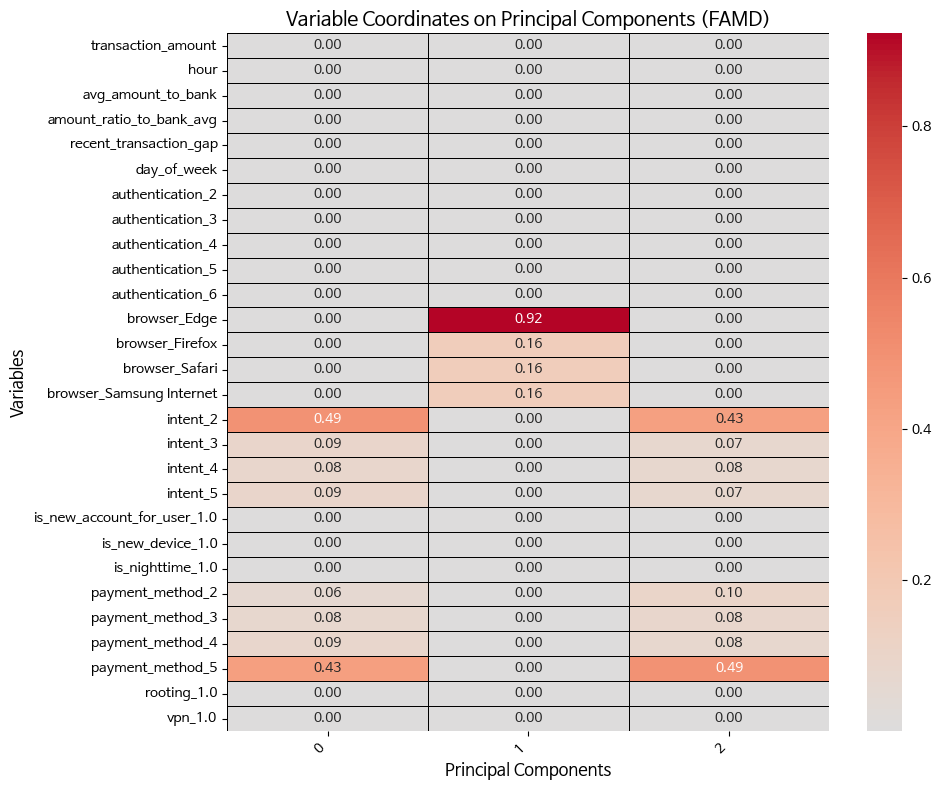

In [255]:
%matplotlib inline
plt.figure(figsize=(10, 8)) # 그래프 크기 설정

# seaborn.heatmap 함수 사용
# annot=True: 각 셀에 좌표 값을 표시
# cmap='coolwarm': 파란색(음수)-흰색(0 근처)-빨간색(양수)으로 표현되는 발산형 컬러맵을 사용
# 좌표의 부호(+/-)를 직관적으로 보여줍니다. 다른 cmap (예: 'RdBu_r', 'vlag')도 가능
# center=0: 컬러맵의 중앙값을 0으로 설정하여 양수와 음수를 구분
# fmt=".2f": 셀에 표시될 숫자의 형식을 소수점 둘째 자리까지로 지정
# linewidths=.5: 셀 사이에 가는 실선을 추가하여 구분
# linecolor='black': 셀 사이 실선의 색상을 지정합니다

heatmap = sns.heatmap(
    famd.column_coordinates_,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=.5,
    linecolor='black',
    cbar=True # 컬러바 표시 (기본값 True)
)

plt.title('Variable Coordinates on Principal Components (FAMD)', fontsize=14) # 그래프 제목 설정
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 그래프 보여주기
plt.show()

## 클러스터링

In [256]:
transformed_data = famd.transform(famd_df)
transformed_data.index = famd_df.index

# 1. DBSCAN 모델 정의 및 학습 (적절한 eps, min_samples 값 지정 필요)
dbscan = DBSCAN(eps=0.6, min_samples=5)
cluster_labels = dbscan.fit_predict(transformed_data)

# 2. 결과를 데이터프레임에 칼럼으로 추가
famd_df['cluster'] = cluster_labels

# 3. id 정보가 담긴 df_id와 병합
df_result = pd.concat([df['user_id'], famd_df[['cluster']]], axis=1)

# 4. 결과 출력 예시
print(df_result.head())

     user_id  cluster
0  user_5552        0
1  user_7227        1
2    unknown        2
3  user_1188        3
4  user_4923        2


In [259]:
# 4 minority cluster
df_result['cluster'].value_counts().sort_values().head(4)

cluster
26    437
24    891
20    921
21    954
Name: count, dtype: int64

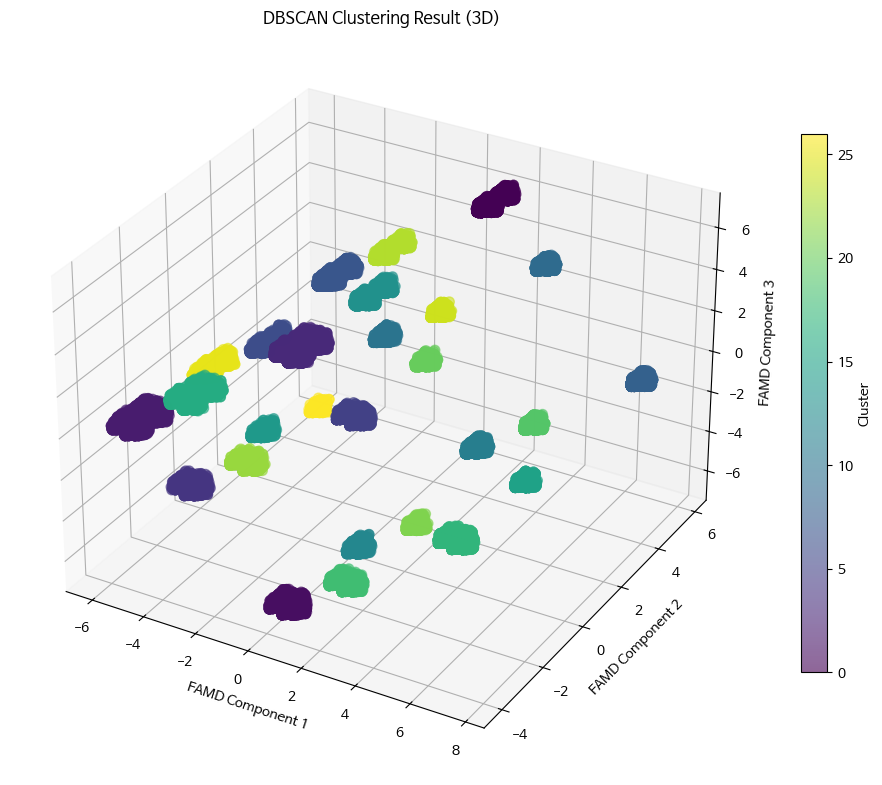

In [261]:
# 3D 플롯 생성
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')  # projection='3d'로 3D 플롯 설정

# transformed_data를 사용하여 3D 산점도 그리기
# x, y, z축에 각각 FAMD의 1, 2, 3번째 주성분을 사용
# hue는 cluster_labels를 사용하여 클러스터별로 색상을 다르게 표시
# palette는 'viridis'를 사용 (다른 팔레트도 가능)
scatter = ax.scatter(transformed_data[0], transformed_data[1], transformed_data[2],
                     c=cluster_labels, cmap='viridis', s=50, alpha=0.6)

# 축 레이블 설정
ax.set_xlabel('FAMD Component 1')
ax.set_ylabel('FAMD Component 2')
ax.set_zlabel('FAMD Component 3')

# 그래프 제목 설정
ax.set_title('DBSCAN Clustering Result (3D)')

# 컬러바 추가 (클러스터 레이블과 색상 매핑 표시)
fig.colorbar(scatter, label='Cluster', shrink=0.7, aspect=20)

# 그래프 보여주기
plt.show()

# Rule based Fraud Detection

In [262]:
rb_df = df.copy()

1. 고액 및 심야 시간대 조합 rule
  - 조건: transaction_amout(가격)가 특정 threshold 초과(예를 들어 100만원 초과 시) + 정상적인 시간대가 아닌 경우(자정 ~ 새벽 6시)인 경우
  - 근거: 한국에서의 비정상 시간대(예를 들어 시차로 인해 해외에서 접속할 경우)에 threshold를 넘어서는 금액인 경우 fraud일 가능성이 있음
  - 방법: 조건문 생성

2. IP 주소 기반 단기 거래 빈도 확인(velocity check)
 - 조건: 동일한 ip_address에서 짧은 시간내에 일정 횟수 이상 거래 발생하는 경우 (예를 들어 1시간 내에 5회 이상 거래 발생)
 - 근거: 동일한 IP 주소에서 여러 번 거래 탐지.
 - 방법: 시간 경과에 따른 거래 수 추적 필요

3. VPN 사용 및 고액 거래 조합
 - 조건: vpn 사용 감지, 가격이 일정 threshold 이상
 - 근거: vpn을 통해 고액거래시 위험성 존재
 - 방법: 조건문 생성

4. 취약한 인증 방식 및 고액 거래 조합
 - 조건: 인증방식 없음(authentication_unknown = True)인 경우 특정 가격 이상
 - 근거: 보안 수준이 낮은데 특정 가격 이상이면 위험성 존재
 - 방법 조건문 생성

5. 기기 정보 및 브라우저 정보가 없는데(접근 경로가 불분명한 경우) 고액 거래 조합
 - 조건: 디바이스 ID(device_id_unknown = True) 또는 브라우저(browser_unknown = True) 정보가 없는 상태에서 특정 금액 이상 송금하는 경우
 - 근거: 출처 불분명한데 높은 송금액 보내는 경우 위험성 존재
 - 방법: 조건문 생성


6. 지역 기반 규칙
 - 조건: 사용자의 일반적인 거래 지역이 아닌 다른 region에서 거래 발생하고 고액 거래 발생
 - 근거: 사용자의 평소 활동 지역이 아닌 지역일 경우, 기기나 계정 탈취 등일 가능성
 - 방법: 과거 데이터 기반으로 평소 활동지역 파악, 조건문 생성

7. 소액 다수 거래 패턴 규칙(velocity check)
- 조건: 특정 사용자 ID에 대해 짧은 시간(예: 1시간) 내에 소액(예: 10000원 미만)거래가 특정 횟수 이상 발생
- 근거: 기기 도난된 경우 유효성 판단을 위해 소액 거래를 여러번 시도하는 경우 발생 -> detection 필요
- 방법: 조건문 생성

In [266]:
from datetime import datetime
class FraudDetector:
    def __init__(self, df):
        self.df = rb_df
        self.high_amount_threshold = self.df['transaction_amount'].quantile(0.95)
        self.low_amount_threshold = self.df['transaction_amount'].quantile(0.25)
        self.transaction_amount = 1500000
        self.high_velocity_threshold = 5
        self.fraud_flags = ['high_amount_night_flag', 'ip_velocity_flag',
                           'vpn_high_amount_flag', 'weak_auth_high_amount_flag',
                           'unknown_device_rooting_flag',
                           'low_amount_high_velocity_flag'] #'unusual_region_flag'

    def high_amount_night_time_rule(self, transaction_amount, transaction_time, threshold):
      """
      고액 및 심야 시간대 조합 rule

      Args:
        transaction_amount: 거래 금액.
        transaction_time: 거래 시간 (datetime 객체).
        threshold: 고액으로 판단할 기준 금액 (기본값: 사용자 설정).

      Returns:
        True: 조건을 만족하는 경우 (고액 및 심야 시간대 거래).
        False: 조건을 만족하지 않는 경우.
      """
      # 심야 시간대 (자정 ~ 새벽 6시) 여부 확인
      is_night_time = 0 <= transaction_time.hour < 6

      # 고액 거래 여부 확인
      is_high_amount = transaction_amount > threshold

      # 두 조건을 모두 만족하는 경우 True 반환
      return is_night_time and is_high_amount

    def ip_velocity_check(self, transaction_velocity_ip, threshold=5):
        """
        IP 주소 기반 단기 거래 빈도 확인(velocity check)
        """
        return transaction_velocity_ip > threshold

    def vpn_high_amount_check(self, is_vpn_used, transaction_amount, high_amount_threshold):
        """
        VPN 사용 및 고액 거래 조합
        """
        return (is_vpn_used == True) & (transaction_amount > high_amount_threshold)

    def weak_auth_high_amount_check(self, authentication_unknown, transaction_amount, high_amount_threshold):
        """
        취약한 인증 방식 및 고액 거래 조합
        """
        return (authentication_unknown == True) & (transaction_amount > high_amount_threshold)

    def unknown_device_browser_check(self, device_id_unknown, browser_unknown, transaction_amount, high_amount_threshold):
        """
        기기 정보 및 브라우저 정보가 없는데(접근 경로가 불분명한 경우) 고액 거래 조합
        """
        return ((device_id_unknown == True) | (browser_unknown == True)) & (transaction_amount > high_amount_threshold)

    def unusual_region_check(self, is_high_amount_unusual_region):
        """
        지역 기반 규칙
        """
        return is_high_amount_unusual_region

    def low_amount_high_velocity_check(self, transaction_amount, transaction_velocity_ip, low_amount_threshold, high_velocity_threshold=5):
        """
        소액 다수 거래 패턴 규칙(velocity check)
        """
        return (transaction_amount < low_amount_threshold) & (transaction_velocity_ip > high_velocity_threshold)

    def detect_fraud(self):
        # self.df['is_high_amount_unusual_region'] = (df['is_unusual_region']) & (df['transaction_amount'] > self.high_amount_threshold)
        self.df['transaction_velocity_ip'] = self.df.groupby('ip_address')['ip_address'].transform('count')
        self.df['is_vpn_used'] = self.df.groupby('ip_address')['vpn_1.0'].transform('max')
        self.df['high_amount_night_flag'] = self.df.apply(lambda row: self.high_amount_night_time_rule(row['transaction_amount'], row['transaction_time'], self.high_amount_threshold), axis=1)
        self.df['ip_velocity_flag'] = self.df['transaction_velocity_ip'].apply(self.ip_velocity_check)
        self.df['vpn_high_amount_flag'] = self.df.apply(lambda row: self.vpn_high_amount_check(row['is_vpn_used'], row['transaction_amount'], self.high_amount_threshold), axis=1)
        self.df['weak_auth_high_amount_flag'] = self.df.apply(lambda row: self.weak_auth_high_amount_check(row['authentication_6'], row['transaction_amount'], self.high_amount_threshold), axis=1)
        self.df['unknown_device_rooting_flag'] = self.df.apply(lambda row: self.unknown_device_browser_check(row['is_new_device_1.0'], row['rooting_1.0'], row['transaction_amount'], self.high_amount_threshold), axis=1)
        # self.df['unusual_region_flag'] = self.df['is_high_amount_unusual_region']
        self.df['low_amount_high_velocity_flag'] = self.df.apply(lambda row: self.low_amount_high_velocity_check(row['transaction_amount'], row['transaction_velocity_ip'], self.low_amount_threshold), axis=1)

        # Combine Flags
        self.df['fraud_flag'] = self.df[self.fraud_flags].any(axis=1)

        return self.df

In [267]:
rb_df.columns

Index(['transaction_time', 'user_id', 'recipient', 'transaction_amount',
       'hour', 'device_id', 'region', 'receiver_bank', 'receiver_account',
       'avg_amount_to_bank', 'amount_ratio_to_bank_avg',
       'recent_transaction_gap', 'ip_address', 'app_version', 'day_of_week',
       'authentication_2', 'authentication_3', 'authentication_4',
       'authentication_5', 'authentication_6', 'payment_method_2',
       'payment_method_3', 'payment_method_4', 'payment_method_5',
       'browser_Edge', 'browser_Firefox', 'browser_Safari',
       'browser_Samsung Internet', 'intent_2', 'intent_3', 'intent_4',
       'intent_5', 'is_new_account_for_user_1.0', 'is_nighttime_1.0',
       'is_new_device_1.0', 'vpn_1.0', 'rooting_1.0',
       'transaction_velocity_ip', 'is_vpn_used', 'high_amount_night_flag',
       'ip_velocity_flag', 'vpn_high_amount_flag',
       'weak_auth_high_amount_flag', 'unknown_device_rooting_flag',
       'low_amount_high_velocity_flag', 'fraud_flag'],
      dtype='

In [268]:
detector = FraudDetector(rb_df)

detector.detect_fraud()

transaction_time    user_id recipient  transaction_amount  \
0                           NaT  user_5552        엄마        90303.642928   
1                           NaT  user_7227   unknown        49569.947184   
2     2025-02-23 23:27:03+00:00    unknown         형        22986.930377   
3     2025-03-18 19:46:41+00:00  user_1188      기부단체        22986.930377   
4     2025-01-23 05:50:59+00:00  user_4923      자기자신         7535.020148   
...                         ...        ...       ...                 ...   
99995 2025-03-15 01:20:00+00:00    unknown         형       108731.073725   
99996 2025-01-30 14:50:52+00:00    unknown        마트         4121.928245   
99997 2025-01-31 23:35:18+00:00  user_5533      자기자신       448474.991546   
99998                       NaT  user_7759   unknown        22986.930377   
99999 2025-01-03 16:52:50+00:00  user_1013      택시기사        22986.930377   

       hour         device_id                   region receiver_bank  \
0      11.0  55cb0014-b5c5-49  36.8340973, 126.6460652         카카오뱅크   
1       4.0  05d63db3-30f0-4c  34.6297573, 128.4948156          하나은행   
2      23.0  1c745104-8d4a-40                     None          토스뱅크   
3      19.0  41b0a509-eb15-47   36.437711, 129.2764827          토스뱅크   
4       5.0  28c0f519-33db-43                     None         카카오뱅크   
...     ...               ...                      ...           ...   
99995   1.0  549f1d2b-d16f-4b                     None          하나은행   
99996  14.0  06eea982-493c-44  38.1903391, 128.2430743       unknown   
99997  23.0  90e50588-fdbb-44  35.4170158, 128.3319924          우리은행   
99998  11.0  f887e43a-111d-4b    36.8488241, 127.86149          토스뱅크   
99999  16.0  20a7c4bf-75fa-4a  35.3620833, 127.4785708          국민은행   

       receiver_account  avg_amount_to_bank  amount_ratio_to_bank_avg  \
0          2.657744e+10            250359.0                      0.34   
1          4.978755e+11            300525.0                      0.16   
2          3.965687e+11            279106.0                      0.08   
3          3.914781e+11            250359.0                      1.03   
4          8.266176e+11            260746.0                      0.03   
...                 ...                 ...                       ...   
99995      4.978755e+11            287937.0                      0.38   
99996      7.197914e+11            250359.0                      0.01   
99997      5.732896e+11            184295.0                      0.09   
99998      4.195725e+11            279245.0                      0.02   
99999      6.996579e+11            225000.0                      0.01   

       recent_transaction_gap      ip_address app_version  day_of_week  \
0                        42.8         unknown        None          NaN   
1                        27.0         unknown     3.5.9+5          NaN   
2                        30.5     17.66.66.70     3.1.9+3          6.0   
3                        15.7   196.129.94.16    5.8.4+10          1.0   
4                        30.5   10.223.161.25     4.0.4+9          3.0   
...                       ...             ...         ...          ...   
99995                    22.5   16.220.91.219     3.1.1+1          5.0   
99996                    17.5  162.191.34.218     4.5.6+8          3.0   
99997                    45.7     51.42.18.84        None          4.0   
99998                    42.4    37.238.20.80    4.9.3+10          NaN   
99999                    34.7         unknown        None          4.0   

       authentication_2  authentication_3  authentication_4  authentication_5  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     1                 0                 0                 0   
3                     0                 0                 0                 0   
4                     1                 0                 0       

In [269]:
# Create the fraud_warning DataFrame
fraud_warning = rb_df[rb_df['fraud_flag'] == True]

# Create the rb_df_normal DataFrame (optional, but recommended)
rb_df_normal = rb_df[rb_df['fraud_flag'] == False]

display(fraud_warning.head())
print(fraud_warning.shape)
display(rb_df_normal.head())
print(rb_df_normal.shape)

transaction_time    user_id recipient  transaction_amount  hour  \
0                        NaT  user_5552        엄마        90303.642928  11.0   
1                        NaT  user_7227   unknown        49569.947184   4.0   
9  2025-01-14 04:43:14+00:00  user_9808      기부단체        22986.930377  11.0   
11 2025-04-09 03:22:36+00:00  user_6862         형         5335.586063   3.0   
13 2025-02-14 04:40:18+00:00  user_5173   unknown        17850.439909  11.0   

           device_id                   region receiver_bank  receiver_account  \
0   55cb0014-b5c5-49  36.8340973, 126.6460652         카카오뱅크      2.657744e+10   
1   05d63db3-30f0-4c  34.6297573, 128.4948156          하나은행      4.978755e+11   
9   13b916ed-d364-41  35.7848388, 126.5447118          하나은행      5.927236e+11   
11  1ae5e3ea-9f98-47  37.0266448, 126.1927896          우리은행      4.751961e+11   
13  728efdbd-23d4-46   35.646124, 128.4538146          국민은행      4.978755e+11   

    avg_amount_to_bank  amount_ratio_to_bank_avg  recent_transaction_gap  \
0             250359.0                      0.34                    42.8   
1             300525.0                      0.16                    27.0   
9             252568.0                      0.05                    31.8   
11            250359.0                      0.09                    30.5   
13            214493.0                      0.08                    30.5   

   ip_address app_version  day_of_week  authentication_2  authentication_3  \
0     unknown        None          NaN                 0                 0   
1     unknown     3.5.9+5          NaN                 0                 0   
9     unknown        None          1.0                 0                 0   
11    unknown     1.0.5+3          2.0                 0                 1   
13    unknown     1.4.5+9          4.0                 0                 1   

    authentication_4  authentication_5  authentication_6  payment_method_2  \
0                  0                 0                 0                 1   
1                  0                 0                 0                 0   
9                  0                 1                 0                 0   
11                 0                 0                 0                 0   
13                 0                 0                 0                 0   

    payment_method_3  payment_method_4  payment_method_5  browser_Edge  \
0                  0                 0                 0             1   
1                  0                 0                 1             0   
9                  0                 0                 1             1   
11                 0                 0                 0             1   
13                 0                 1                 0             1   

    browser_Firefox  browser_Safari  browser_Samsung Internet  intent_2  \
0                 0               0                         0         1   
1                 0               0                         1         0   
9                 0               0                         0         1   
11                0               0                         0         0   
13                0               0                         0         1   

    intent_3  intent_4  intent_5  is_new_account_for_user_1.0  \
0          0         0         0                            0   
1          0         1         0                            1   
9          0         0         0                            1   
11         0         1         0                            0   
13         0         0         0                            0   

    is_nighttime_1.0  is_new_device_1.0  vpn_1.0  rooting_1.0  \
0                  0                  0        0            0   
1                  1                  1        0            1   
9                  1                  0        1            0   
11                 0                  1        1            0   
13                 0                  1    

(23249, 46)


transaction_time    user_id recipient  transaction_amount  hour  \
2 2025-02-23 23:27:03+00:00    unknown         형        22986.930377  23.0   
3 2025-03-18 19:46:41+00:00  user_1188      기부단체        22986.930377  19.0   
4 2025-01-23 05:50:59+00:00  user_4923      자기자신         7535.020148   5.0   
5                       NaT  user_6539        회사        22986.930377   5.0   
6                       NaT  user_8651        아빠        22986.930377  11.0   

          device_id                  region receiver_bank  receiver_account  \
2  1c745104-8d4a-40                    None          토스뱅크      3.965687e+11   
3  41b0a509-eb15-47  36.437711, 129.2764827          토스뱅크      3.914781e+11   
4  28c0f519-33db-43                    None         카카오뱅크      8.266176e+11   
5  34fde9ea-6c4b-4b                    None          하나은행      8.425724e+11   
6           unknown                    None          하나은행      2.621955e+11   

   avg_amount_to_bank  amount_ratio_to_bank_avg  recent_transaction_gap  \
2            279106.0                      0.08                    30.5   
3            250359.0                      1.03                    15.7   
4            260746.0                      0.03                    30.5   
5            250359.0                      0.15                    12.0   
6            280882.0                      0.11                     6.0   

      ip_address app_version  day_of_week  authentication_2  authentication_3  \
2    17.66.66.70     3.1.9+3          6.0                 1                 0   
3  196.129.94.16    5.8.4+10          1.0                 0                 0   
4  10.223.161.25     4.0.4+9          3.0                 1                 0   
5   74.17.101.47     5.2.2+8          NaN                 0                 0   
6  93.171.25.125     1.3.1+1          NaN                 0                 0   

   authentication_4  authentication_5  authentication_6  payment_method_2  \
2                 0                 0                 0                 0   
3                 0                 0                 0                 1   
4                 0                 0                 0                 0   
5                 0                 0                 0                 0   
6                 0                 0                 1                 0   

   payment_method_3  payment_method_4  payment_method_5  browser_Edge  \
2                 1                 0                 0             0   
3                 0                 0                 0             0   
4                 1                 0                 0             0   
5                 0                 0                 0             0   
6                 0                 0                 0             0   

   browser_Firefox  browser_Safari  browser_Samsung Internet  intent_2  \
2                0               0                         1         0   
3                0               1                         0         1   
4                0               0                         1         0   
5                1               0                         0         0   
6                1               0                         0         1   

   intent_3  intent_4  intent_5  is_new_account_for_user_1.0  \
2         1         0         0                            0   
3         0         0         0                            0   
4         0         1         0                            0   
5         0         1         0                            1   
6         0         0         0                            0   

   is_nighttime_1.0  is_new_device_1.0  vpn_1.0  rooting_1.0  \
2                 0                  1        0            0   
3                 0                  0        0            0   
4                 1                  0        1            1   
5                 0                  1        1            0   
6                 1                  0        0            0   

   transacti

(76751, 46)


# Modeling

## Model 1: Logistic Regression

- 룰 기반으로 데이터셋 분리한 이유: labeling을 하기 위함
- 순서: 라벨링 데이터셋 결합 -> target/feature 분리 -> 전처리 -> 모델 훈련 -> 예측 및 평가
- fake data를 통한 베이스라인 작성 중이므로 파인튜닝은 일단 진행하지 않음

In [270]:
fraud_warning.head()

transaction_time    user_id recipient  transaction_amount  hour  \
0                        NaT  user_5552        엄마        90303.642928  11.0   
1                        NaT  user_7227   unknown        49569.947184   4.0   
9  2025-01-14 04:43:14+00:00  user_9808      기부단체        22986.930377  11.0   
11 2025-04-09 03:22:36+00:00  user_6862         형         5335.586063   3.0   
13 2025-02-14 04:40:18+00:00  user_5173   unknown        17850.439909  11.0   

           device_id                   region receiver_bank  receiver_account  \
0   55cb0014-b5c5-49  36.8340973, 126.6460652         카카오뱅크      2.657744e+10   
1   05d63db3-30f0-4c  34.6297573, 128.4948156          하나은행      4.978755e+11   
9   13b916ed-d364-41  35.7848388, 126.5447118          하나은행      5.927236e+11   
11  1ae5e3ea-9f98-47  37.0266448, 126.1927896          우리은행      4.751961e+11   
13  728efdbd-23d4-46   35.646124, 128.4538146          국민은행      4.978755e+11   

    avg_amount_to_bank  amount_ratio_to_bank_avg  recent_transaction_gap  \
0             250359.0                      0.34                    42.8   
1             300525.0                      0.16                    27.0   
9             252568.0                      0.05                    31.8   
11            250359.0                      0.09                    30.5   
13            214493.0                      0.08                    30.5   

   ip_address app_version  day_of_week  authentication_2  authentication_3  \
0     unknown        None          NaN                 0                 0   
1     unknown     3.5.9+5          NaN                 0                 0   
9     unknown        None          1.0                 0                 0   
11    unknown     1.0.5+3          2.0                 0                 1   
13    unknown     1.4.5+9          4.0                 0                 1   

    authentication_4  authentication_5  authentication_6  payment_method_2  \
0                  0                 0                 0                 1   
1                  0                 0                 0                 0   
9                  0                 1                 0                 0   
11                 0                 0                 0                 0   
13                 0                 0                 0                 0   

    payment_method_3  payment_method_4  payment_method_5  browser_Edge  \
0                  0                 0                 0             1   
1                  0                 0                 1             0   
9                  0                 0                 1             1   
11                 0                 0                 0             1   
13                 0                 1                 0             1   

    browser_Firefox  browser_Safari  browser_Samsung Internet  intent_2  \
0                 0               0                         0         1   
1                 0               0                         1         0   
9                 0               0                         0         1   
11                0               0                         0         0   
13                0               0                         0         1   

    intent_3  intent_4  intent_5  is_new_account_for_user_1.0  \
0          0         0         0                            0   
1          0         1         0                            1   
9          0         0         0                            1   
11         0         1         0                            0   
13         0         0         0                            0   

    is_nighttime_1.0  is_new_device_1.0  vpn_1.0  rooting_1.0  \
0                  0                  0        0            0   
1                  1                  1        0            1   
9                  1                  0        1            0   
11                 0                  1        1            0   
13                 0                  1    

In [271]:
# 1. 이상거래 + 정상거래 데이터 결합
df_logistic_test = pd.concat([fraud_warning, rb_df_normal]).reset_index(drop=True)

In [272]:
# 데이터셋 전처리(모델마다 처리 방법 다르니 재사용시 주의)
# 안쓰는 컬럼 drop
df_logistic_test.drop(['transaction_time', 'user_id', 'recipient', 'region', 'device_id', 'ip_address', 'receiver_bank', 'receiver_account', 'app_version'], axis=1, inplace = True)

# boolean type 변환
bool_cols = df_logistic_test.select_dtypes(include='bool').columns
df_logistic_test[bool_cols] = df_logistic_test[bool_cols].astype(int)

In [273]:
df_logistic_test.columns[df_logistic_test.isnull().any()]

Index(['day_of_week'], dtype='object')

In [274]:
# NaN 데이터 처리
# df_logistic_test['hour'].fillna(df_logistic_test['hour'].mode()[0], inplace=True)
df_logistic_test['day_of_week'].fillna(df_logistic_test['day_of_week'].mode()[0], inplace=True)

print(df_logistic_test[['hour', 'day_of_week']].isnull().sum())

hour           0
day_of_week    0
dtype: int64


In [275]:
# 2. Feature / Target 분리
X = df_logistic_test.drop(columns=['fraud_flag'])
y = df_logistic_test['fraud_flag']

# 3. 숫자형 및 불리언 피처만 사용 (기본 베이스라인용)
X = X.select_dtypes(include=['float64', 'int64', 'bool'])

# 4. 학습/테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 5. 스케일링 (스케일 영향 받는 모델이므로 추천)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [286]:
# 6. 로지스틱 회귀 모델 훈련
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [287]:
# 7. 예측 및 평가
y_pred_lr = model.predict(X_test_scaled)
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_lr))

✅ Confusion Matrix:
 [[15349     1]
 [    0  4650]]

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15350
           1       1.00      1.00      1.00      4650

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## Model 2: RandomForestClassifier

In [279]:
df_logistic_test.head(1)

transaction_amount  hour  avg_amount_to_bank  amount_ratio_to_bank_avg  \
0        90303.642928  11.0            250359.0                      0.34   

   recent_transaction_gap  day_of_week  authentication_2  authentication_3  \
0                    42.8          2.0                 0                 0   

   authentication_4  authentication_5  authentication_6  payment_method_2  \
0                 0                 0                 0                 1   

   payment_method_3  payment_method_4  payment_method_5  browser_Edge  \
0                 0                 0                 0             1   

   browser_Firefox  browser_Safari  browser_Samsung Internet  intent_2  \
0                0               0                         0         1   

   intent_3  intent_4  intent_5  is_new_account_for_user_1.0  \
0         0         0         0                            0   

   is_nighttime_1.0  is_new_device_1.0  vpn_1.0  rooting_1.0  \
0                 0                  0        0            0   

   transaction_velocity_ip  is_vpn_used  high_amount_night_flag  \
0                    20081            1                       0   

   ip_velocity_flag  vpn_high_amount_flag  weak_auth_high_amount_flag  \
0                 1                     0                           0   

   unknown_device_rooting_flag  low_amount_high_velocity_flag  fraud_flag  
0                            0                              0           1

In [289]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [290]:
# 예측 및 평가
y_pred_rf = model.predict(X_test_scaled)
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))

✅ Confusion Matrix:
 [[15350     0]
 [    0  4650]]

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15350
           1       1.00      1.00      1.00      4650

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [292]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

## Stacking

## 시각화

In [ ]:
# 확률값 얻기
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

### ROC + AUC Curve

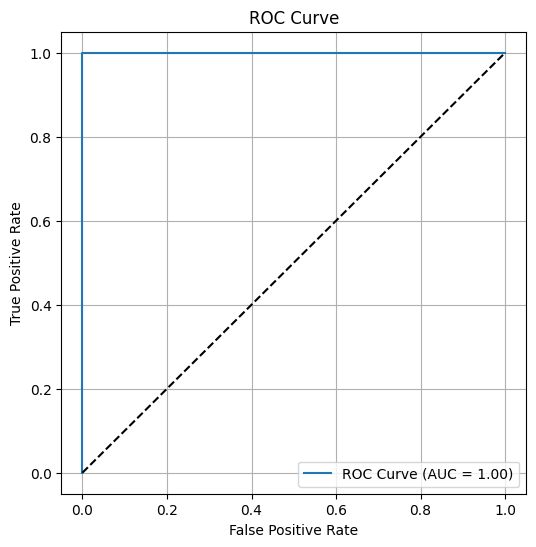

In [ ]:
# 시각화
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Precison-Recall Curve

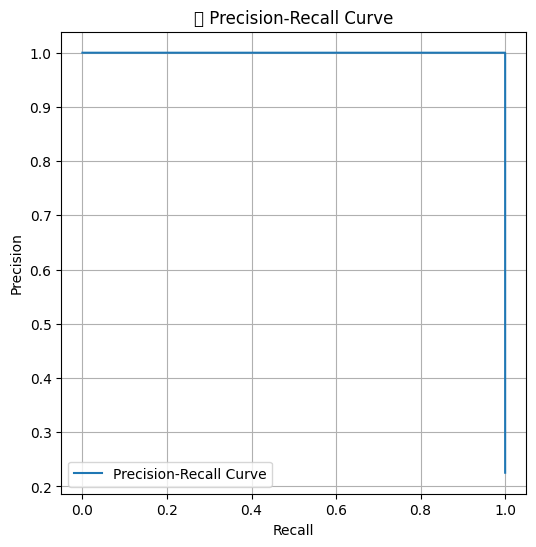

In [ ]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📊 Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

## Fine Tuning

# Result

- fake data를 사용한 베이스라인 작업 -> 각자 모델 생성 및 예측 진행 -> (추가)deploy, serving 단계까지 미리 예습 필요
- 이후, 실제 json 파일 넘어올 경우 모델 학습 -> ensemble/voting/stacking -> deploy

In [305]:
!git config --list

filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=j808esc@gmail.com
user.name=Quietseong
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/Quietseong/MCP_Voice_Transfer.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


# Github

In [306]:
!git config --global user.email "j808esc@gmail.com"
!git config --global user.name "Quietseong"

In [293]:
!git clone https://github.com/Quietseong/MCP_Voice_Transfer.git

Cloning into 'MCP_Voice_Transfer'...
remote: Enumerating objects: 486, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 486 (delta 97), reused 177 (delta 49), pack-reused 241 (from 1)
Receiving objects: 100% (486/486), 502.04 KiB | 3.89 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [294]:
%cd /content/MCP_Voice_Transfer

/content/MCP_Voice_Transfer


In [295]:
!git checkout -b FRD_yongseong

Switched to a new branch 'FRD_yongseong'


In [297]:
!git add .

In [304]:
# 원격 저장소 확인
!git remote -v

origin	https://github.com/Quietseong/MCP_Voice_Transfer.git (fetch)
origin	https://github.com/Quietseong/MCP_Voice_Transfer.git (push)


In [303]:
!git commit -m "ver_1.0"
!git push origin FRD_yongseong

On branch FRD_yongseong
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
